In [1]:
# imports
import pandas as pd
import numpy as np
import sys 
sys.path.append('..')
sys.path.append('../src')

from DataHandling.loading import load_data
from DataHandling import visualization as vis
from DataHandling import processing as proc

TURBINE_ID_BRITISH = 2  ### set turbine id you would like to inspect
TURBINE_ID_BRAZILIAN = 1 ### set turbine id you would like to inspect

### AUTHOR: Harald Kugler

**Description of the datasets:** 

1. British: The Kelmarsh dataset comprises information from six wind turbines at the coast of Britain spanning the years 2016 to 2022, with data being captured at 10-minute intervals. The dataset contains a total of 298 measured variables.

2. Brazilian: The Breberibe dataset includes information of six wind turbines at the coast of Brazil spanning the years 2013 and 2014. Data is captured in 10-minute intervals aswell. Overall there are 48 variables measured.

## Loading Data

In [2]:
turbine_brit = load_data(turbine_id=TURBINE_ID_BRITISH, which_data="British")
turbine_braz = load_data(turbine_id=TURBINE_ID_BRAZILIAN, which_data="Brazilian")
turbine_brit.shape, turbine_braz.shape

((288864, 298), (52560, 40))

In [7]:
# eliminate columns with over 50% NaNs, since they are not useful
turbine_brit.dropna(axis=1, thresh=int(0.5*len(turbine_brit)), inplace=True)
turbine_braz.dropna(axis=1, thresh=int(0.5*len(turbine_braz)), inplace=True)

## Feature Selection

- very important step: 1. Using physically meaningful features, 2. Qualitative Analysis via correlation plots etc. --> Final features
- properties: same features for brazilian and british data set, physical meaningful variables, not to many to consider occams razor

- wanna include time somehow to capture seasonal, daily aspects


In [8]:
for key in turbine_braz.keys():
    print(key)

wind_speed
wind_direction
wind_speed_std
wind_direction_std
wind_speed_max
wind_speed_min
wind_speed_cube
air_temperature
relative_humidity
air_pressure
logger_temperature
battery_V
ws_u
ws_v
ws_w
sonic_temperature
sonic_wind_speed
sonic_wind_direction
tilt_X
tilt_Y
tilt_X_std
tilt_Y_std
wind_speed_nacelle
wind_speed_nacelle_max
wind_speed_nacelle_min
rotor_rpm
rotor_rpm_max
rotor_rpm_min
active_power_total
active_power_total_max
active_power_total_min
act_position
air_density
UST
UST_flag
HS
HS_flag
TKE
LMO
ws_w_corrected


In [9]:
for key in turbine_brit.keys():
    print(key)

Wind speed (m/s)
Wind speed, Standard deviation (m/s)
Wind speed, Minimum (m/s)
Wind speed, Maximum (m/s)
Long Term Wind (m/s)
Wind speed Sensor 1 (m/s)
Wind speed Sensor 1, Standard deviation (m/s)
Wind speed Sensor 1, Minimum (m/s)
Wind speed Sensor 1, Maximum (m/s)
Wind speed Sensor 2 (m/s)
Wind speed Sensor 2, Standard deviation (m/s)
Wind speed Sensor 2, Minimum (m/s)
Wind speed Sensor 2, Maximum (m/s)
Density adjusted wind speed (m/s)
Wind direction (°)
Nacelle position (°)
Wind direction, Standard deviation (°)
Wind direction, Minimum (°)
Wind direction, Maximum (°)
Nacelle position, Standard deviation (°)
Nacelle position, Minimum (°)
Nacelle position, Maximum (°)
Vane position 1+2 (°)
Energy Export (kWh)
Energy Export counter (kWh)
Energy Import (kWh)
Lost Production (Contractual) (kWh)
Lost Production (Time-based IEC B.2.2) (kWh)
Lost Production (Time-based IEC B.2.3) (kWh)
Lost Production (Time-based IEC B.2.4) (kWh)
Lost Production (Time-based IEC B.3.2) (kWh)
Lost Producti

In [10]:
# feature selection
FEATURES = [
    "Power (kW)",
    "Wind speed (m/s)"
]
    # "Long Term Wind (m/s)",
    # "Wind direction (°)",
    # "Nacelle position (°)",
    # "Nacelle ambient temperature (°C)",
    # "Rotor speed (RPM)",
    # "Yaw bearing angle (°)",
    # "Density adjusted wind speed (m/s)",
# ]

FEATURES_BRAZ = [
    "active_power_total",
    "wind_speed",
]

We proceed with data cleansing, which involves eliminating any NaN values at the start or end of the dataframe and applying interpolation to fill in the NaNs within the middle portion. This process results in the generation of a time series for each feature, all of which do not have any missing values. We have created a function in processing.py that gets this job done.

In [11]:
turbine_brit = proc.remove_nans(turbine_brit[FEATURES])
turbine_braz = proc.remove_nans(turbine_braz[FEATURES_BRAZ])

# rename columns of brazilian data set such that they are equal to the british ones
turbine_braz.rename(columns={"active_power_total": "Power (kW)", "wind_speed": "Wind speed (m/s)"}, inplace=True)

## Visualization

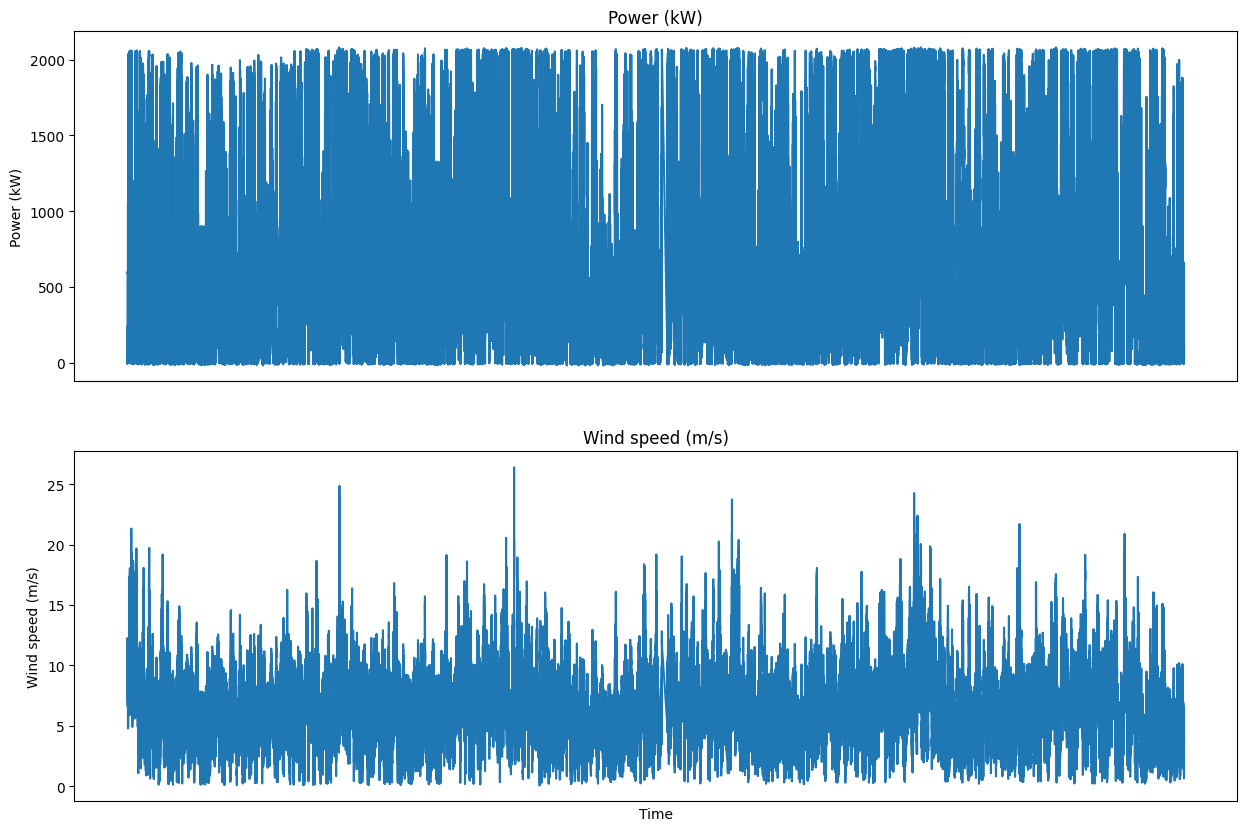

In [12]:
# variables over time
vis.plot_var_over_time(column_name=FEATURES, data=turbine_brit, start_time='2016-01-03', end_time='2021-07-01')

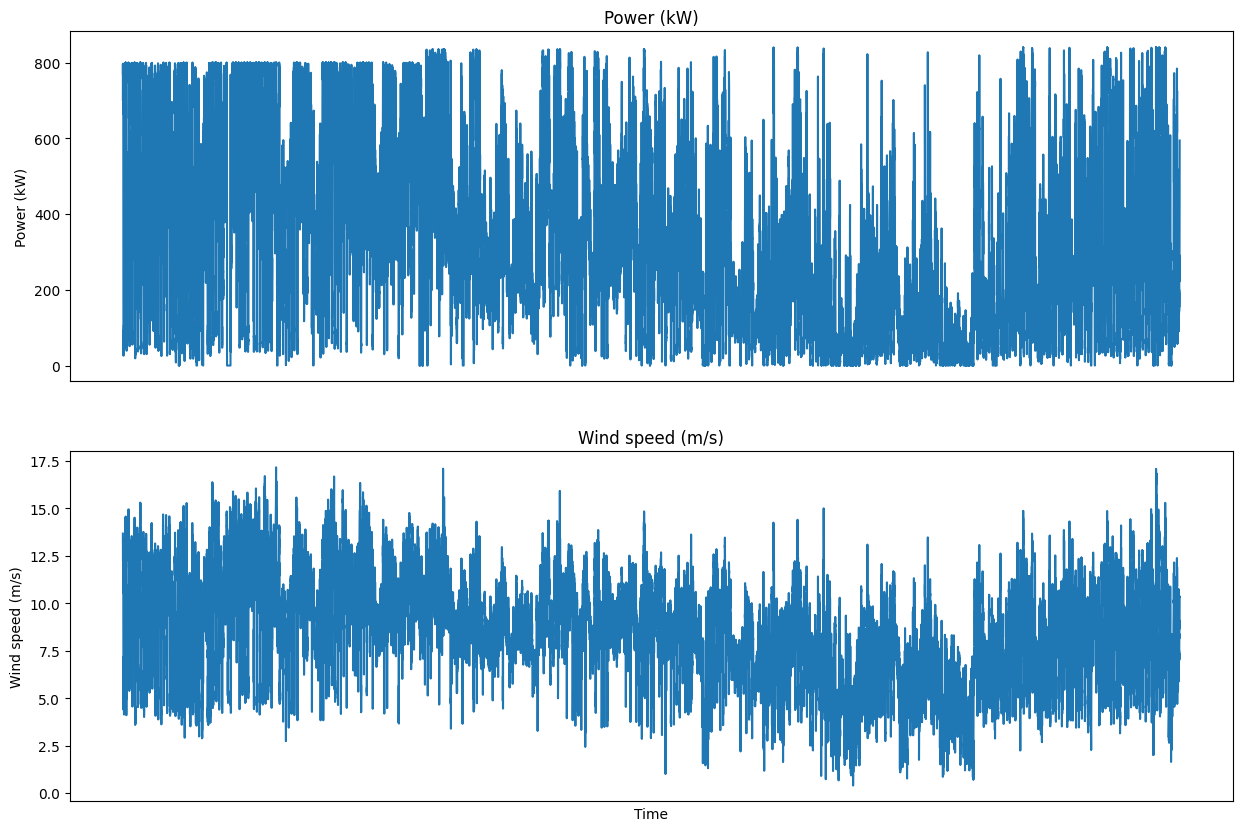

In [13]:
# variables over time
vis.plot_var_over_time(column_name=FEATURES, data=turbine_braz, start_time='2013-08-01', end_time='2019-12-31')

### Correlation plots

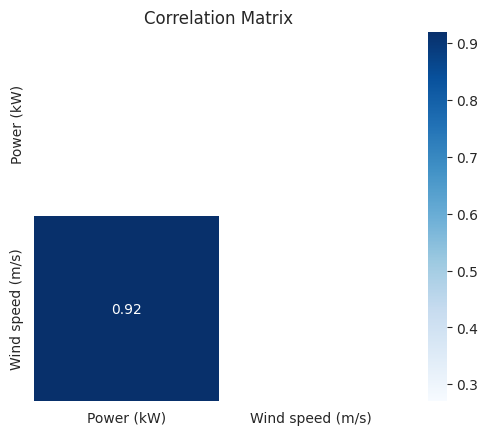

In [14]:
# vis.plot_corr_matrix(turbine_brit, FEATURES)
vis.correlationplot(turbine_brit)


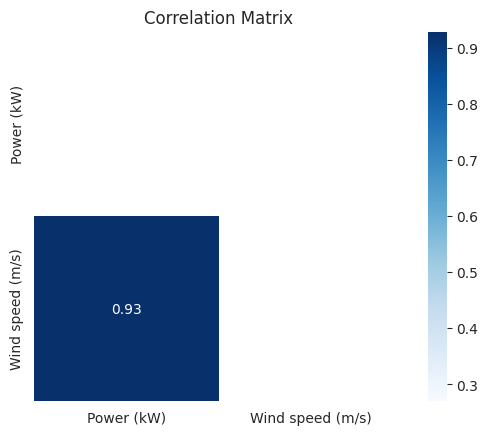

In [15]:
vis.correlationplot(turbine_braz)

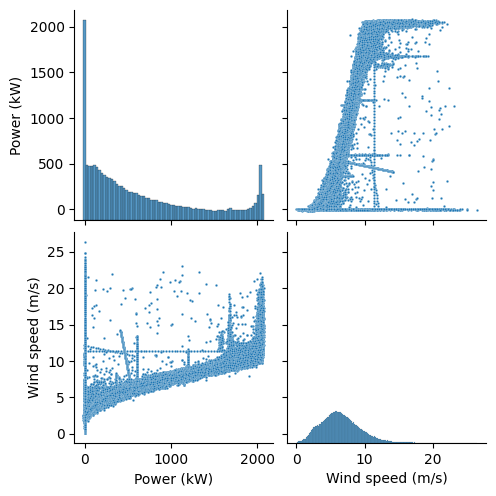

In [16]:
vis.scatter_plot(turbine_brit, FEATURES)

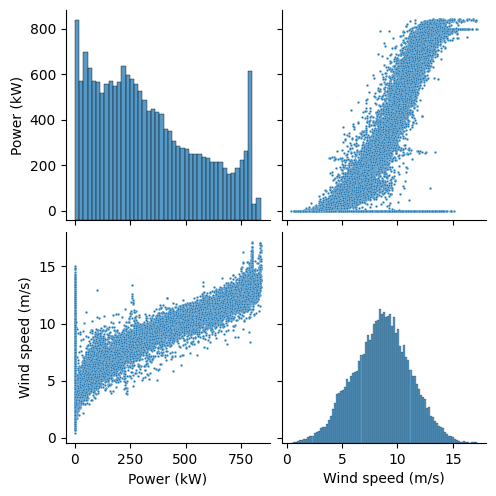

In [17]:
vis.scatter_plot(turbine_braz, FEATURES)

**Analysis:**

- British and Brazilian wind turbines have diverent maxima. We have to address this if we want the additional challenge to work. 
- Correlation == 1 means that this variable does not yield additional information to the power output and thus can be deleted.

In [18]:
# apply results of analysis

TODO: 

- Find solution where Power == 0 and wind speed is not
- Encode time as a feature
- Find features that are identical between Brazilian and British data set

## Save proprocessed data 

In [19]:
# save data 
turbine_brit.to_csv(f'../data/cleaned/turbine_brit_{TURBINE_ID_BRITISH}.csv')
turbine_braz.to_csv(f'../data/cleaned/turbine_braz_{TURBINE_ID_BRAZILIAN}.csv')